In [1]:
import matplotlib.pyplot as plt
import numpy as np

try:
    import SafeRLBench as srb
    import SafeRLBench.envs as envs
    import SafeRLBench.tools as tools
    import SafeRLBench.algo as algo
except ImportError:
    import sys
    import os
    module_path = os.path.abspath('..')
    sys.path.append(module_path)
    import SafeRLBench as srb
    import SafeRLBench.envs as envs
    import SafeRLBench.tools as tools
    import SafeRLBench.algo as algo
    
np.set_printoptions(precision=5)

In [2]:
lincar = envs.LinearCar()

#policy_par = lambda par: (lambda x: par[0] + par[1:].dot(x))

policy_par = lambda par: (lambda x: np.exp(par[0] - par[1:].dot(x)) - 1.5)

policy = tools.Policy(policy_par,(3))
optimizer = algo.PolicyGradient(lincar, estimator='central_fd', max_it=1000, eps=0.000001,  
                                rate = 1)


In [3]:
optimizer.optimize(policy)

Run: 100  	Parameter: 	[  7.6921   13.16178   1.63965]
		Gradient: 	[ 0.03492 -0.06305 -0.00065]
		Average Time: 	0.01s/step
Run: 200  	Parameter: 	[  6.62461  10.36469   3.3174 ]
		Gradient: 	[-0.00401 -0.05507  0.03053]
		Average Time: 	0.01s/step
Run: 300  	Parameter: 	[ 7.04389  9.56486  4.6468 ]
		Gradient: 	[ 0.01622 -0.00625  0.04557]
		Average Time: 	0.01s/step
Run: 400  	Parameter: 	[ 6.43948  7.62802  7.17521]
		Gradient: 	[-0.0056  -0.02146  0.02979]
		Average Time: 	0.01s/step
Run: 500  	Parameter: 	[  5.04399   4.77729  10.8386 ]
		Gradient: 	[-0.01672 -0.01864  0.02866]
		Average Time: 	0.01s/step
Run: 600  	Parameter: 	[  4.39553   3.79394  12.62188]
		Gradient: 	[ 0.22864 -0.2391   0.01163]
		Average Time: 	0.01s/step
Run: 700  	Parameter: 	[  4.05624   4.09264  13.86458]
		Gradient: 	[-0.28555  0.28374  0.0157 ]
		Average Time: 	0.01s/step
Run: 800  	Parameter: 	[  4.47169   3.95064  14.92071]
		Gradient: 	[ 0.13167 -0.14028  0.00968]
		Average Time: 	0.01s/step
Run: 9

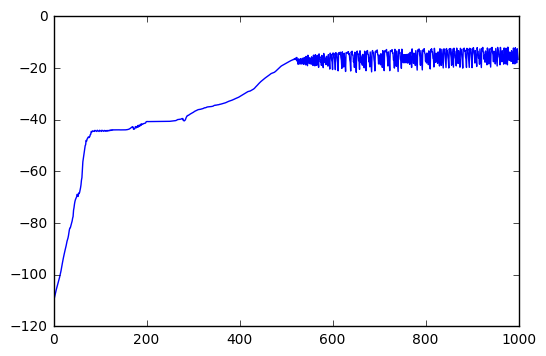

In [4]:
monitor = optimizer.monitor
rewards = monitor.rewards[optimizer]
plt.plot(np.arange(0,len(rewards)),rewards)
plt.show()

Best Parameter:	[  4.81263   4.40675  17.65604]
Best Reward: 	-11.49700808


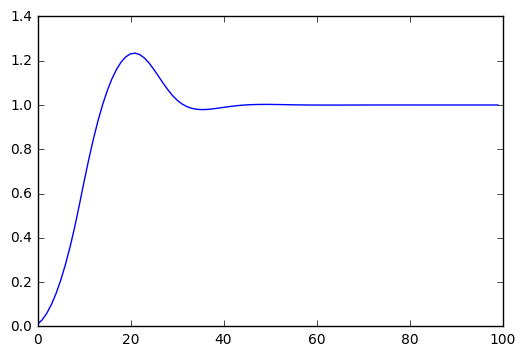

In [11]:
print("Best Parameter:\t"+str(optimizer.best_parameter))
print("Best Reward: \t"+str(optimizer.best_reward))

policy.setParameter(optimizer.best_parameter)
trace = lincar.rollout(policy)

y = np.array([t[0] for t in [s[1] for s in trace]])
x = np.arange(0,len(trace))

plt.plot(x,y)
plt.show()

In [13]:
lincar.monitor.rollout_times[lincar]

[0.003462076187133789,
 0.0036950111389160156,
 0.003016948699951172,
 0.0028228759765625,
 0.0028040409088134766,
 0.00298309326171875,
 0.002140045166015625,
 0.002830982208251953,
 0.0031430721282958984,
 0.0027489662170410156,
 0.0026738643646240234,
 0.0027289390563964844,
 0.002917051315307617,
 0.0020720958709716797,
 0.0021600723266601562,
 0.0020830631256103516,
 0.0022058486938476562,
 0.0023279190063476562,
 0.002045154571533203,
 0.0020339488983154297,
 0.0020360946655273438,
 0.002271890640258789,
 0.0020220279693603516,
 0.002009153366088867,
 0.0020279884338378906,
 0.0020508766174316406,
 0.0020668506622314453,
 0.0021800994873046875,
 0.002226114273071289,
 0.0021140575408935547,
 0.0021009445190429688,
 0.0021169185638427734,
 0.002273082733154297,
 0.002125978469848633,
 0.002123117446899414,
 0.002249002456665039,
 0.0021200180053710938,
 0.0020377635955810547,
 0.002054929733276367,
 0.0020499229431152344,
 0.0020449161529541016,
 0.00203704833984375,
 0.0021390914

In [7]:
policy_par = lambda par: (lambda x: par[0] + par[1:].dot(x))

#policy_par = lambda par: (lambda x: np.exp(par[0] - par[1:].dot(x)) - 1.5)

policy = tools.Policy(policy_par,(3))
optimizer = srb.PolicyGradient(lincar, estimator='forward_fd', max_it=1000, eps=0.0001,  
                       parameter_domain=np.array([-1,1]), rate = 0.2)
optimizer.estimator.var = 0.5

In [8]:
par, conv = optimizer.optimize(policy)

KeyboardInterrupt: 

In [ ]:
rewards = optimizer.rewards
plt.plot(np.arange(0,len(rewards)),rewards)
plt.show()

Best Parameter: [  5.54976  -6.31094 -10.8346 ]
Best Reward: -27.5753021636


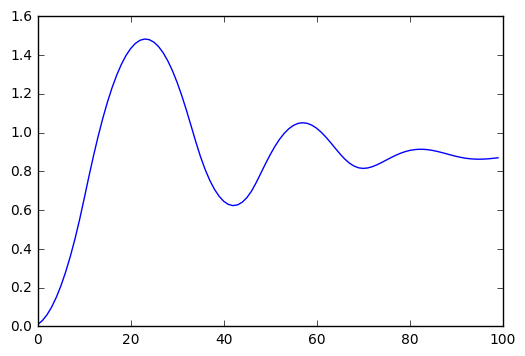

In [8]:
print("Best Parameter: "+str(optimizer.best_parameter))
print("Best Reward: "+str(optimizer.best_reward))

policy.setParameter(optimizer.best_parameter)
trace = lincar.rollout(policy)

y = np.array([t[0] for t in [s[1] for s in trace]])
x = np.arange(0,i+1)

plt.plot(x,y)
plt.show()